# Telecom Customer Churn Analysis.

## Objective:
This project analyzes a telecom dataset to explore patterns related to customer churn.  
We aim to identify key factors that contribute to churn and build a simple predictive model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 2)

## Data overview.

In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(3333, 20)

In [4]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Converting the churn column to 0's and 1's since the churn type is bool

In [6]:
df["Churn"] = df["Churn"].astype("int64")

In [7]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [8]:
df.describe(include=["object"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [9]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64

Average values of churned users.

In [10]:
df[df["Churn"] == 1].select_dtypes(include="number").mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Average time spent on the phone during the day by churned users.

In [11]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

Max values for each feature.

In [12]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

## Data preprocessing.

Replacing Yes/No with True/False.

In [13]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df["Voice mail plan"] = df["Voice mail plan"].map(d)


In [14]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
cols = ["Total day minutes", "Total eve minutes", "Total night minutes"]
df.groupby(["Churn"])[cols].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [16]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [17]:
cols2 = ["Total day calls", "Total eve calls", "Total night calls"]
df.pivot_table(cols2, ["Area code"], aggfunc="mean")

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


Adding new column for total charges.

In [18]:
df["Total_charge"] = (
      df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"])

In [19]:
df["High_service_calls"] = (df["Customer service calls"] > 3).astype("int")

 ### Visualizing the data.

In [20]:
churn = df["Churn"].astype("str")

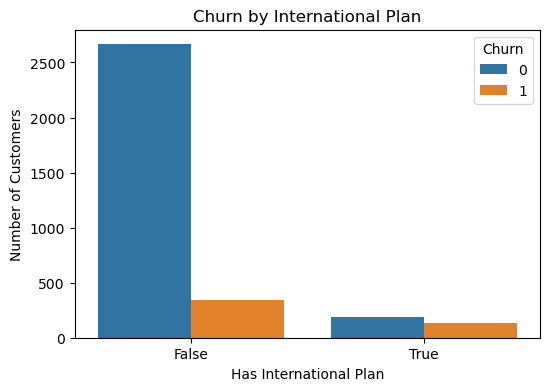

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x="International plan", hue=churn, data=df)
plt.title("Churn by International Plan")
plt.xlabel("Has International Plan")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

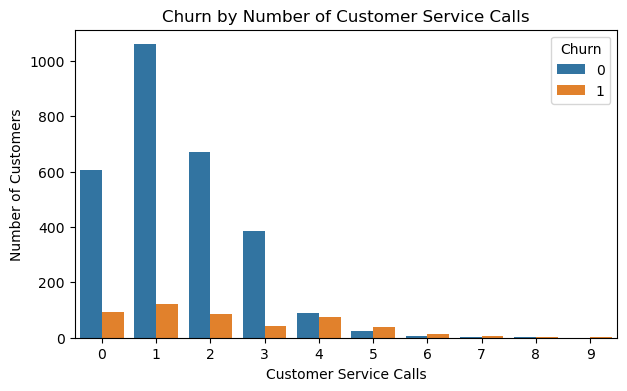

In [22]:
plt.figure(figsize=(7, 4))
sns.countplot(x="Customer service calls", hue=churn, data=df)
plt.title("Churn by Number of Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

In [23]:
pd.crosstab(df["High_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
High_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


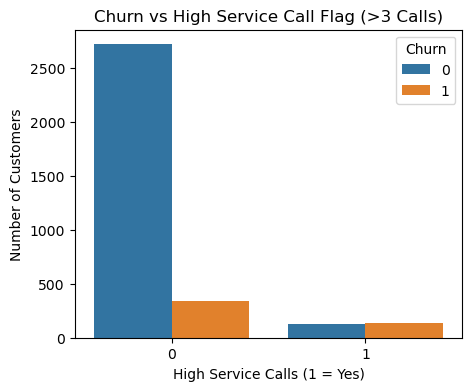

In [24]:
plt.figure(figsize=(5, 4))
sns.countplot(x="High_service_calls", hue=churn, data=df)
plt.title("Churn vs High Service Call Flag (>3 Calls)")
plt.xlabel("High Service Calls (1 = Yes)")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.show()

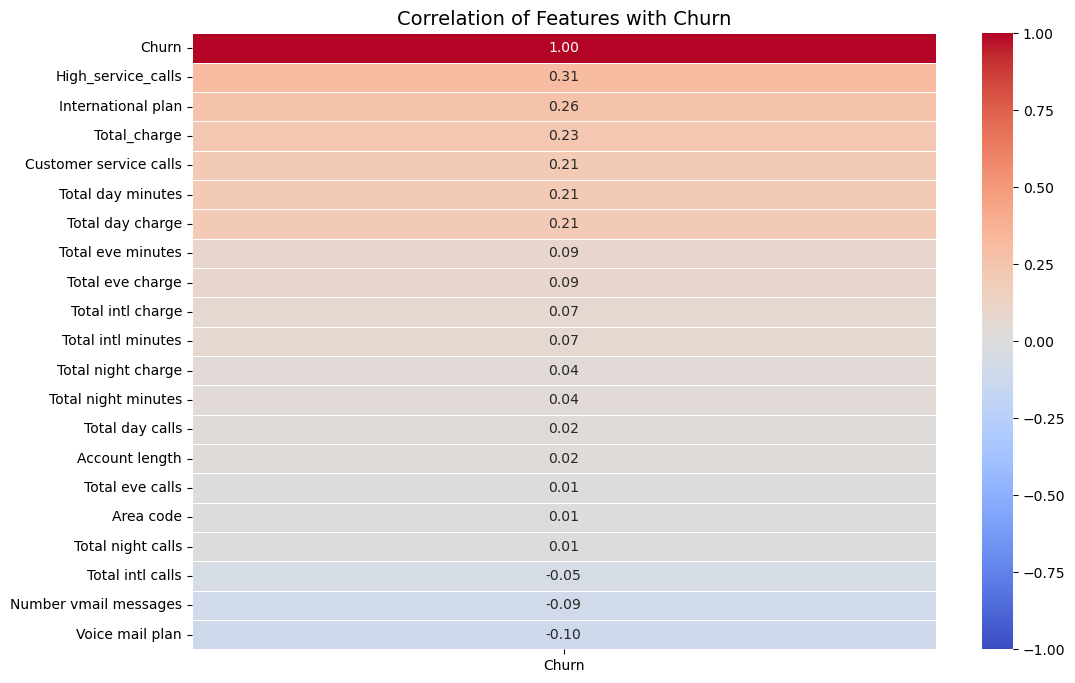

In [25]:
plt.figure(figsize=(12, 8))
churn_corr = df.corr(numeric_only=True)[["Churn"]].sort_values("Churn", ascending=False)
sns.heatmap(churn_corr, annot=True, cmap="coolwarm", fmt=".2f",  vmax=1, vmin=-1, linewidths=0.5)
plt.title("Correlation of Features with Churn", fontsize=14)
plt.show()

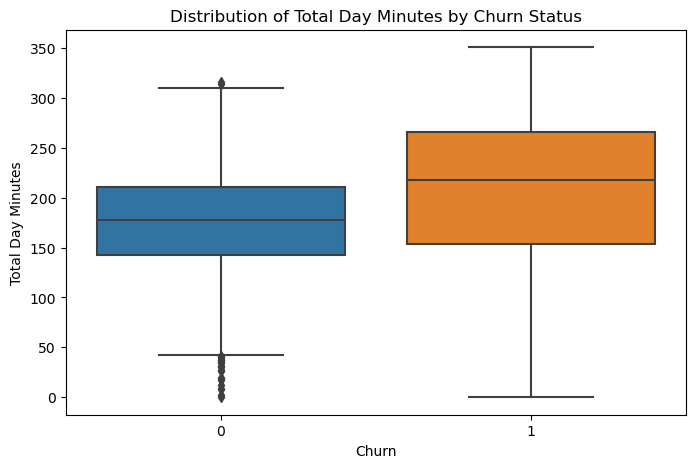

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="Total day minutes", data=df)
plt.title("Distribution of Total Day Minutes by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Total Day Minutes")
plt.show()

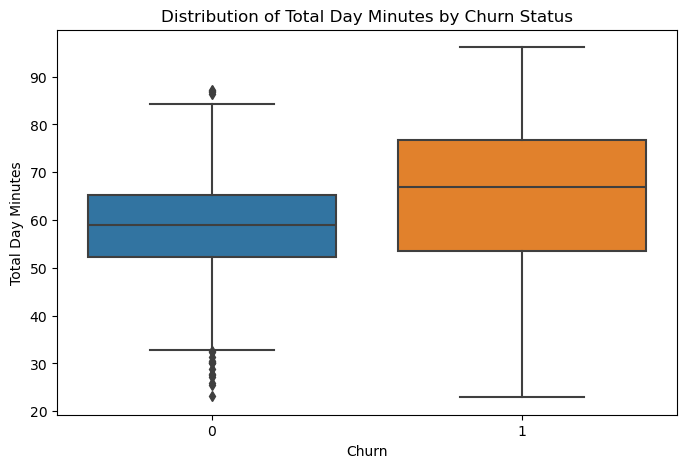

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="Total_charge", data=df)
plt.title("Distribution of Total Day Minutes by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Total Day Minutes")
plt.show()

How customers with high calls **and** international plan are more likely to churn.

In [28]:
pd.crosstab(df["High_service_calls"] & df["International plan"], df["Churn"])

Churn,0,1
row_0,,
False,2841,464
True,9,19


## Building churn prediction model.
We use a logistic regression model to predict customer churn.  
This is a baseline model using only numeric features (no encoding or tuning yet).

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
X = df.select_dtypes(exclude="object").drop("Churn", axis=1)
y = df["Churn"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression(max_iter=5000)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [34]:
y_pred = model.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8500749625187406
Confusion Matrix:
 [[546  20]
 [ 80  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92       566
           1       0.51      0.21      0.30       101

    accuracy                           0.85       667
   macro avg       0.69      0.59      0.61       667
weighted avg       0.82      0.85      0.82       667



**Model Performance Notes:**  
- Overall accuracy: ~85%  
- Churn recall is low (21%), indicates many churners are missed.  
This is expected with imbalanced data and can be improved with future techniques.
